In [4]:
# Install necessary packages
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import requests


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)


In [11]:
# -----------------------------------
# Step 1: Data Loading and Cleaning
# -----------------------------------
# Load dataset directly from GitHub URL
url = "https://raw.githubusercontent.com/angelaaaateng/ftw_python/refs/heads/main/data/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses)%20-%20Form%20Responses%201_UPDATED%20(3).csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,0,4/27/2021 11:02:10,29,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5,7,Master's degree,Woman,White
1,1,4/27/2021 11:02:22,27,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8,7,College degree,Non-binary,White
2,2,4/27/2021 11:02:38,34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2,2,College degree,Woman,White
3,3,4/27/2021 11:02:41,29,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,10,5,College degree,Woman,White
4,4,4/27/2021 11:02:42,31,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,28037,4/27/2024 23:14:10,49,Health care,Research Manager,I do about 50% research and 50% regulatory/adm...,77600,0.0,USD,NaN,NaN,United States,Utah,Salt Lake City,47,7,Master's degree,Woman,White
28038,28038,4/29/2024 14:26:02,37,Hospitality & Events,Director of Training,NaN,85000,NaN,USD,NaN,NaN,United States,Texas,Dallas,30,47,Some college,Woman,White
28039,28039,5/9/2024 11:23:20,30,Computing or Tech,Digital Content Developer,I develop web and email content for consumers ...,80000,6000.0,USD,NaN,NaN,USA,Minnesota,Minneapolis,10,6,College degree,Woman,Asian or Asian American
28040,28040,5/14/2024 11:10:08,26,Business or Consulting,business analyst,NaN,59000,0.0,USD,NaN,NaN,United States,Alabama,birmingham,45,1,College degree,Man,White


In [12]:
# First, let's see what columns we actually have
print("Available columns:", df.columns.tolist())

# Then drop only the columns that exist
columns_to_drop = ["Timestamp", "Unnamed: 0"]  # Keep only the columns we know exist

# Data Cleaning
df = df.drop(columns=columns_to_drop)
df = df.dropna(subset=["What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"])
df["Annual Salary"] = df["What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"].str.replace(',', '').astype(float)
df = df[df["Please indicate the currency"] == "USD"]
df.head()

Available columns: ['Unnamed: 0', 'Timestamp', 'How old are you?', 'What industry do you work in?', 'Job title', 'If your job title needs additional context, please clarify here:', "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)", 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.', 'Please indicate the currency', 'If "Other," please indicate the currency here: ', 'If your income needs additional context, please provide it here:', 'What country do you work in?', "If you're in the U.S., what state do you work in?", 'What city do you work in?', 'How many years of professional work experience do you have overall?', 'How many years of professional work experience do you ha

,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.),Annual Salary
0,29,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5,7,Master's degree,Woman,White,55000.0
2,34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2,2,College degree,Woman,White,34000.0
3,29,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,10,5,College degree,Woman,White,62000.0
4,31,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,9,6,College degree,Woman,White,60000.0
5,33,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,10,2,Master's degree,Man,White,62000.0


In [13]:
# -----------------------------------
# Step 2: Feature Engineering
# -----------------------------------
# Add new feature: Experience Category
def experience_category(years):
    if years < 3:
        return 'Entry-Level'
    elif 3 <= years <= 7:
        return 'Mid-Level'
    elif 7 < years <= 15:
        return 'Senior-Level'
    else:
        return 'Expert-Level'

df['Experience Category'] = df["How many years of professional work experience do you have overall?"].apply(experience_category)

# Add interaction features based on insights
df['Years_in_Field_to_Total_Experience'] = df["How many years of professional work experience do you have in your field?"] / (df["How many years of professional work experience do you have overall?"] + 1)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[["Experience Category", "What is your gender?", "What is your highest level of education completed?"]]).toarray()
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), df_encoded], axis=1)
df

,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,...,What is your gender?_Other or prefer not to answer,What is your gender?_Prefer not to answer,What is your gender?_Woman,What is your gender?_nan,What is your highest level of education completed?_High School,What is your highest level of education completed?_Master's degree,What is your highest level of education completed?_PhD,"What is your highest level of education completed?_Professional degree (MD, JD, etc.)",What is your highest level of education completed?_Some college,What is your highest level of education completed?_nan
0,29,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23357,49,Health care,Research Manager,I do about 50% research and 50% regulatory/adm...,77600,0.0,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23358,37,Hospitality & Events,Director of Training,NaN,85000,NaN,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23359,30,Computing or Tech,Digital Content Developer,I develop web and email content for consumers ...,80000,6000.0,USD,NaN,NaN,USA,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23360,26,Business or Consulting,business analyst,NaN,59000,0.0,USD,NaN,NaN,United States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:

# -----------------------------------
# Step 2: Feature Engineering
# -----------------------------------
# Add new feature: Experience Category
def experience_category(years):
    if years < 3:
        return 'Entry-Level'
    elif 3 <= years <= 7:
        return 'Mid-Level'
    elif 7 < years <= 15:
        return 'Senior-Level'
    else:
        return 'Expert-Level'

df['Experience Category'] = df["How many years of professional work experience do you have overall?"].apply(experience_category)

# Add interaction features based on insights
df['Years_in_Field_to_Total_Experience'] = df["How many years of professional work experience do you have in your field?"] / (df["How many years of professional work experience do you have overall?"] + 1)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[["Experience Category", "What is your gender?", "What is your highest level of education completed?"]]).toarray()
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), df_encoded], axis=1)
df

,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,...,What is your gender?_Other or prefer not to answer,What is your gender?_Prefer not to answer,What is your gender?_Woman,What is your gender?_nan,What is your highest level of education completed?_High School,What is your highest level of education completed?_Master's degree,What is your highest level of education completed?_PhD,"What is your highest level of education completed?_Professional degree (MD, JD, etc.)",What is your highest level of education completed?_Some college,What is your highest level of education completed?_nan
0,29,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23357,49,Health care,Research Manager,I do about 50% research and 50% regulatory/adm...,77600,0.0,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23358,37,Hospitality & Events,Director of Training,NaN,85000,NaN,USD,NaN,NaN,United States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23359,30,Computing or Tech,Digital Content Developer,I develop web and email content for consumers ...,80000,6000.0,USD,NaN,NaN,USA,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23360,26,Business or Consulting,business analyst,NaN,59000,0.0,USD,NaN,NaN,United States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


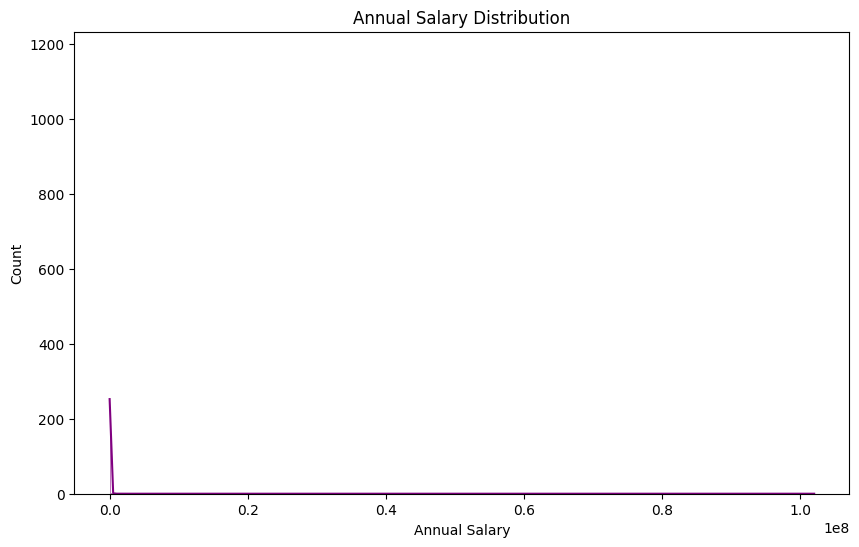

In [15]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df["Annual Salary"], kde=True, color='purple')
plt.title("Annual Salary Distribution")
plt.show()

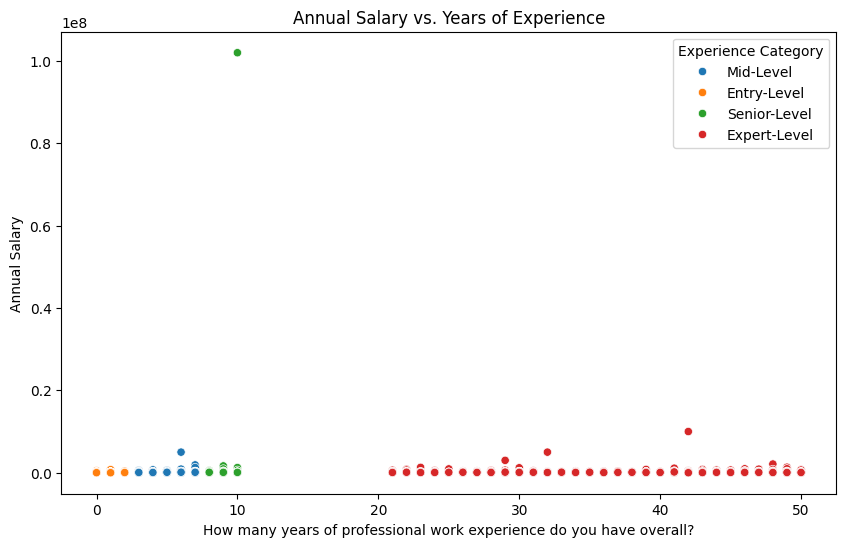

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="How many years of professional work experience do you have overall?", y="Annual Salary", hue='Experience Category')
plt.title("Annual Salary vs. Years of Experience")
plt.show()

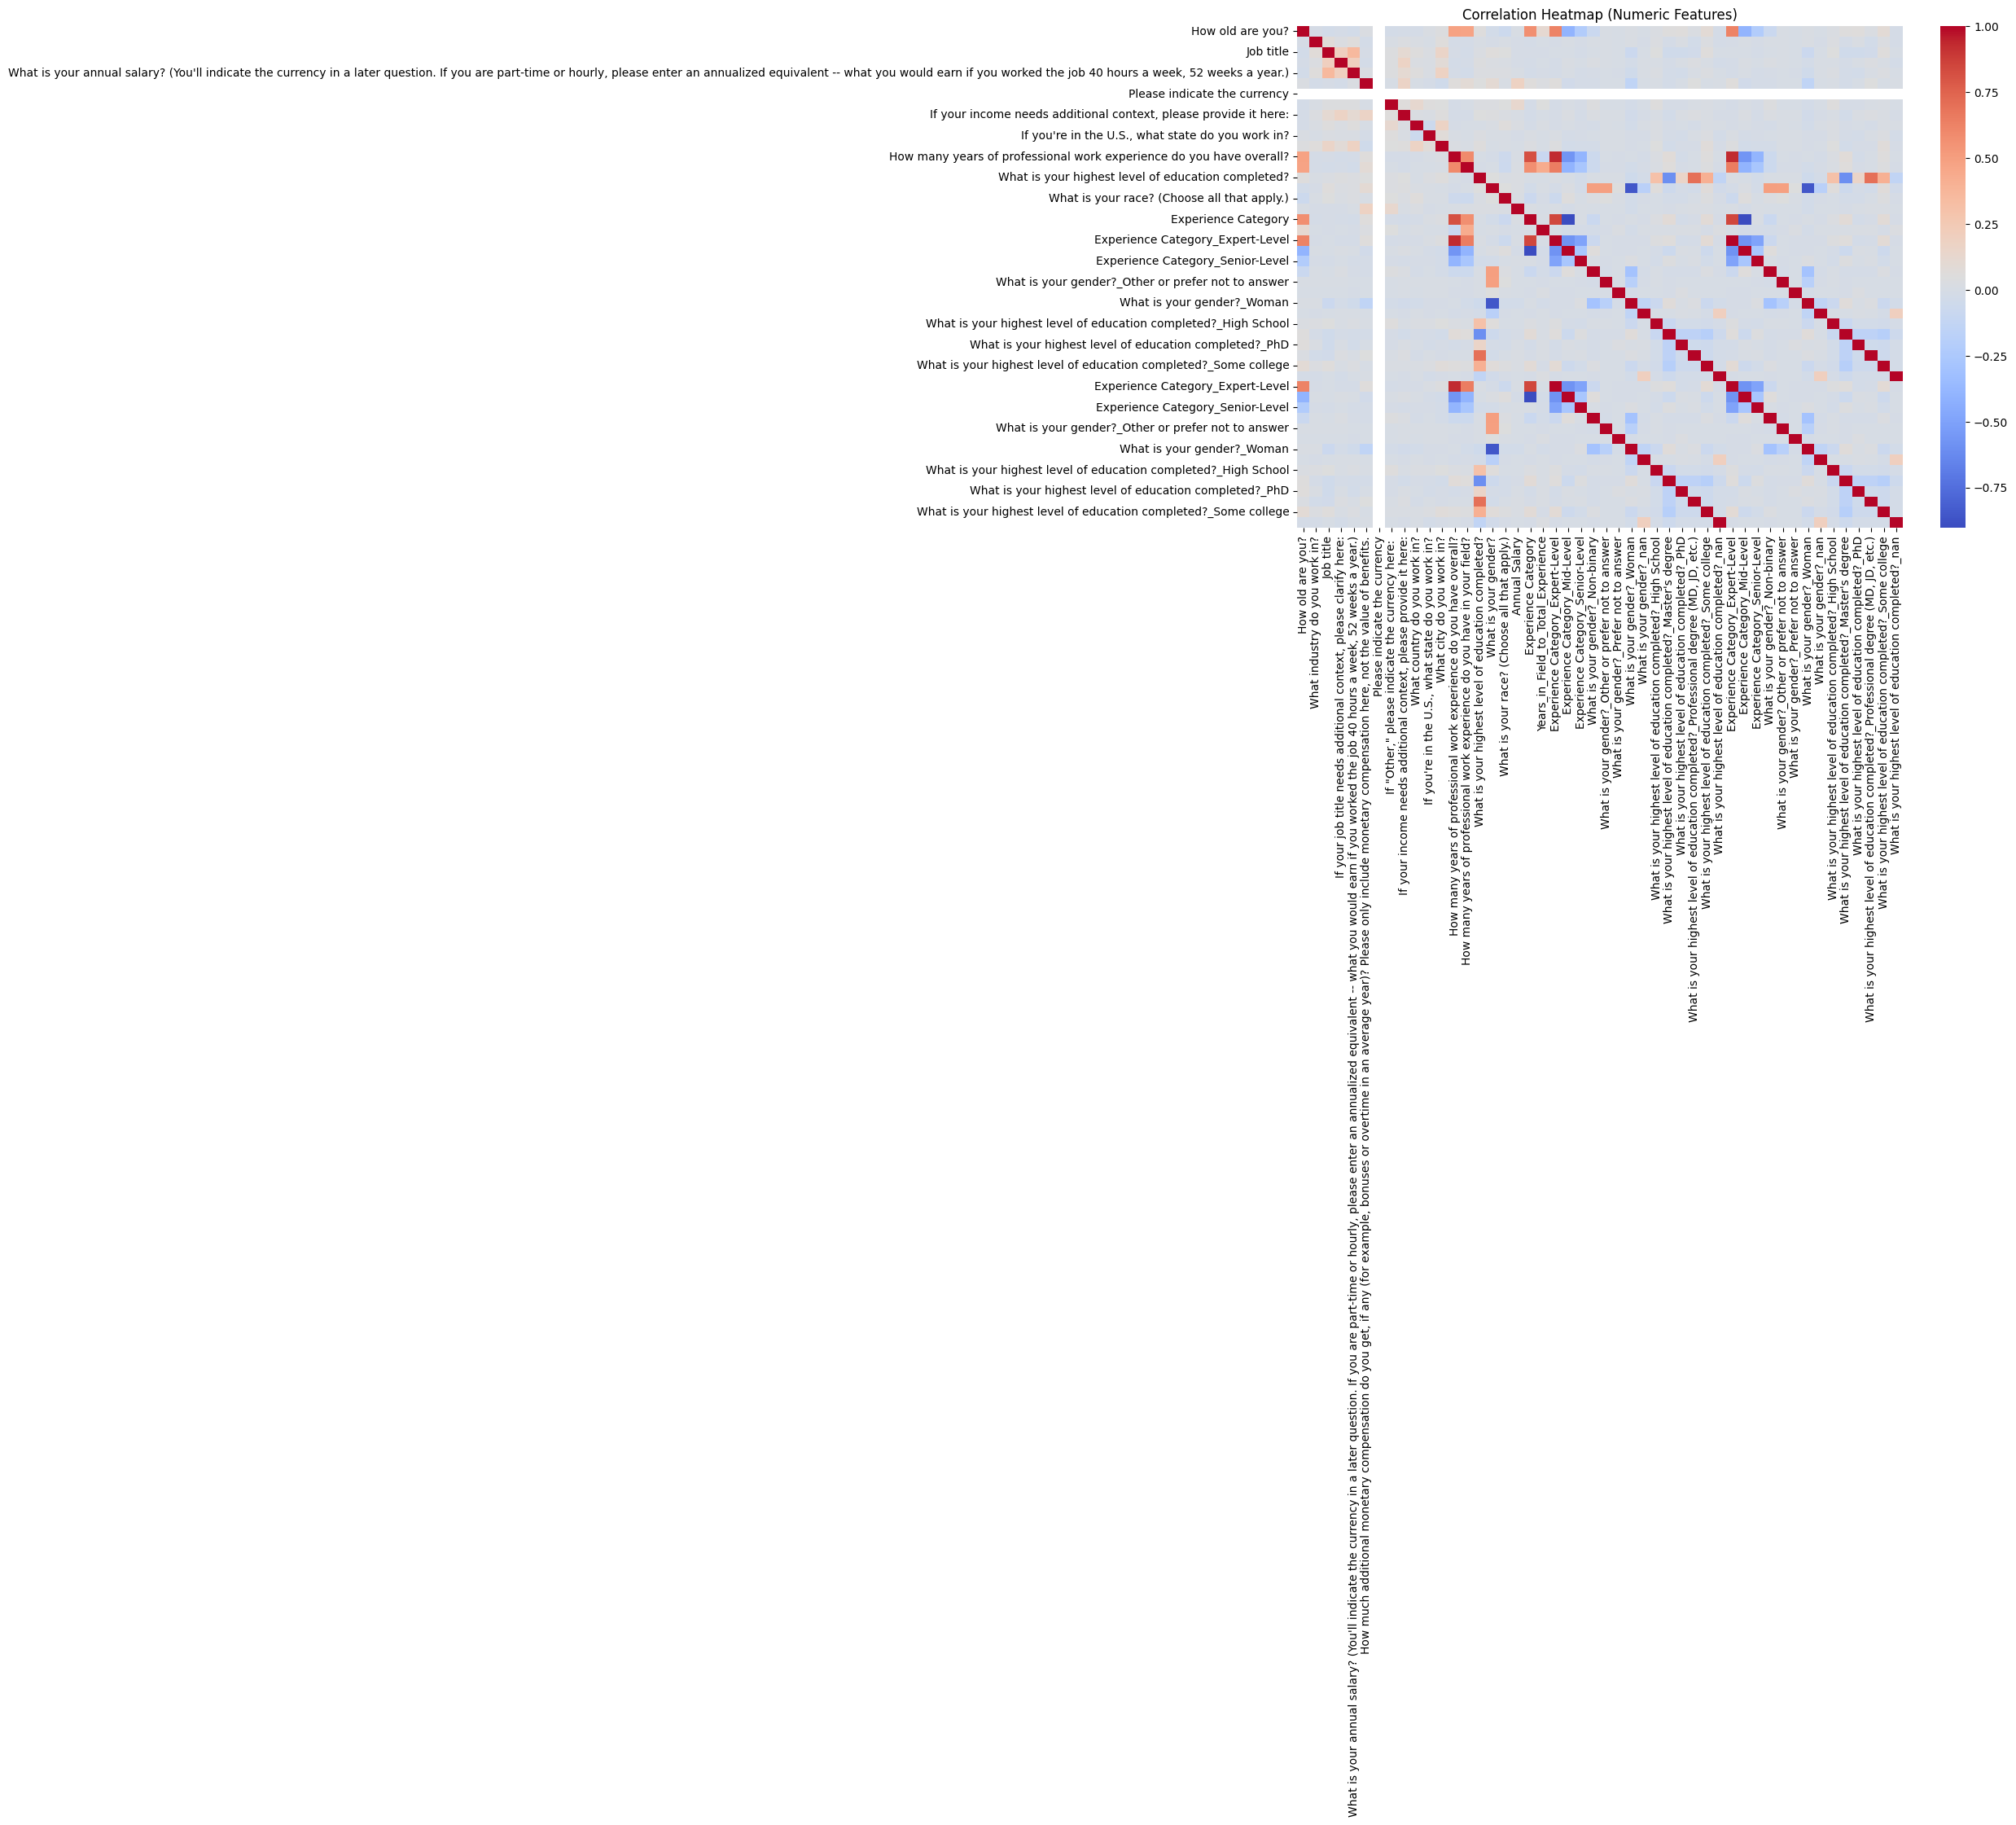

In [20]:
# Correlation heatmap
# Convert categorical features to numeric for correlation analysis
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.factorize(df[col])[0]

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [21]:
# -----------------------------------
# Step 3: Train-Test Split
# -----------------------------------
X = df[["How many years of professional work experience do you have overall?"] + list(df_encoded.columns) + ['Years_in_Field_to_Total_Experience']]
y = df["Annual Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binary Classification
median_salary = y.median()
df["Salary_Class"] = (df["Annual Salary"] > median_salary).astype(int)
y_class = df["Salary_Class"]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [22]:

# -----------------------------------
# Step 4: Hyperparameter Tuning
# -----------------------------------
# Logistic Regression
param_grid_log = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search_log = GridSearchCV(LogisticRegression(max_iter=200), param_grid_log, cv=5)
grid_search_log.fit(X_train_class, y_train_class)
print(f"Best Parameters for Logistic Regression: {grid_search_log.best_params_}")

# Randomized Search for Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=20, cv=5, random_state=42)
random_search_dt.fit(X_train_class, y_train_class)
print(f"Best Parameters for Decision Tree (Randomized Search): {random_search_dt.best_params_}")

# -----------------------------------
# Pros and Cons of Hyperparameter Tuning Methods
# GridSearchCV:
# - Pros: Exhaustive search ensures finding the optimal parameters.
# - Cons: Computationally expensive, especially with large parameter grids.
#
# RandomizedSearchCV:
# - Pros: Faster as it samples from the grid randomly. Suitable for large parameter spaces.
# - Cons: May miss the optimal parameters as it doesn't check every combination.


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Parameters for Decision Tree (Randomized Search): {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}


In [23]:

# -----------------------------------
# Step 5: Voting Classifier
# -----------------------------------
# Create an ensemble model using Logistic Regression and Decision Tree
voting_clf = VotingClassifier(estimators=[('logistic', grid_search_log.best_estimator_),
                                           ('decision_tree', random_search_dt.best_estimator_)],
                              voting='soft')
voting_clf.fit(X_train_class, y_train_class)
y_pred_voting = voting_clf.predict(X_test_class)
print("Voting Classifier Classification Report:")
print(classification_report(y_test_class, y_pred_voting))


Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2399
           1       0.62      0.65      0.63      2274

    accuracy                           0.64      4673
   macro avg       0.64      0.64      0.64      4673
weighted avg       0.64      0.64      0.64      4673



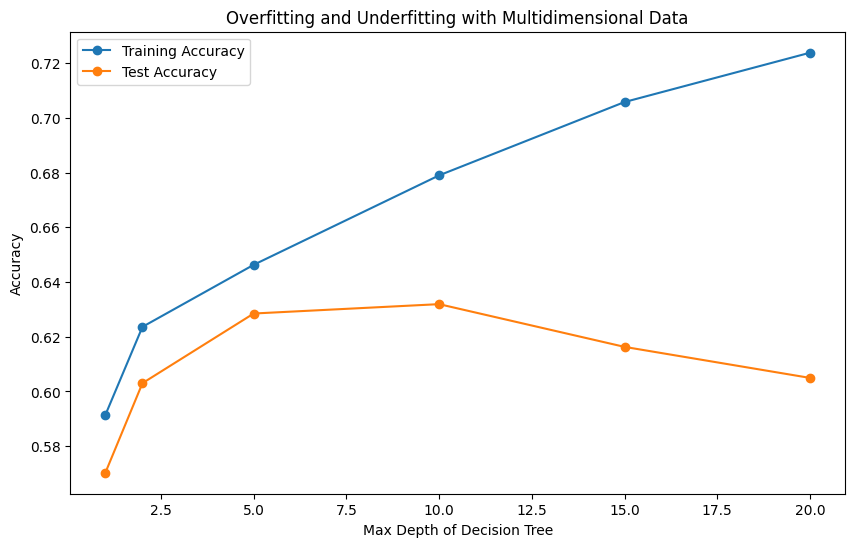

In [24]:

# -----------------------------------
# Step 6: Demonstrating Overfitting and Underfitting
# -----------------------------------
def plot_model_complexity(max_depth_values, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []

    for max_depth in max_depth_values:
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_values, train_scores, label='Training Accuracy', marker='o')
    plt.plot(max_depth_values, test_scores, label='Test Accuracy', marker='o')
    plt.title('Overfitting and Underfitting with Multidimensional Data')
    plt.xlabel('Max Depth of Decision Tree')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

max_depth_values = [1, 2, 5, 10, 15, 20, None]
plot_model_complexity(max_depth_values, X_train_class, X_test_class, y_train_class, y_test_class)


In [25]:

# -----------------------------------
# Step 7: Decision Boundaries for Multidimensional Data
# -----------------------------------
def plot_decision_boundary(model, X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


/Users/amber/Documents/GitHub/ftw_python/.conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


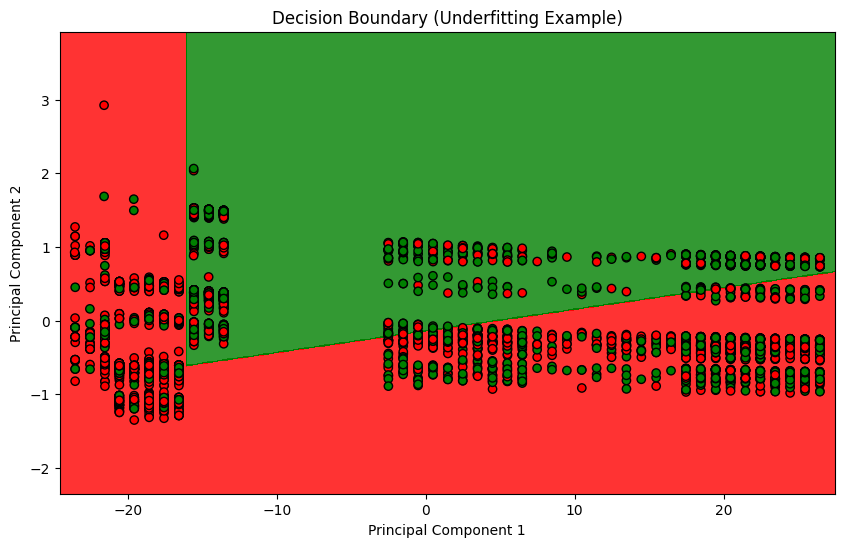

/Users/amber/Documents/GitHub/ftw_python/.conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


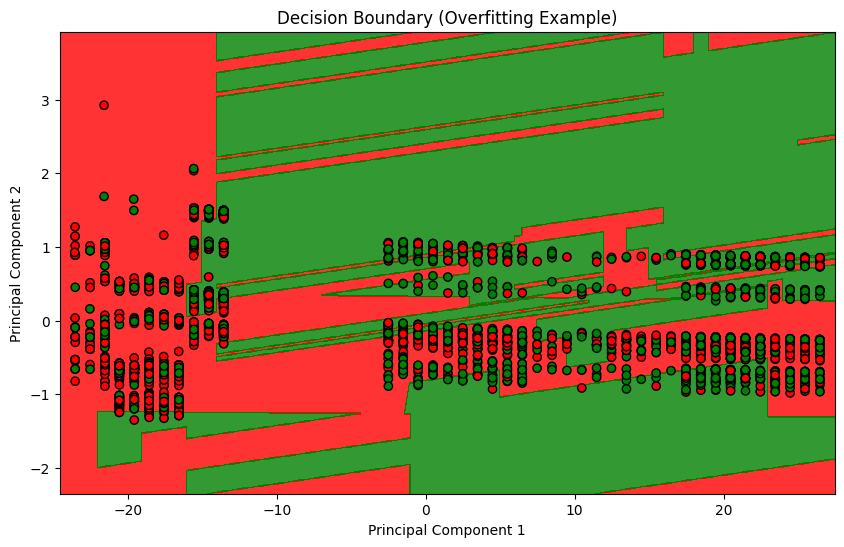

In [26]:

# Underfitting Example
dt_underfit = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_underfit.fit(X_train_class, y_train_class)
plot_decision_boundary(dt_underfit, X_test_class, y_test_class, "Decision Boundary (Underfitting Example)")

# Overfitting Example
dt_overfit = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_overfit.fit(X_train_class, y_train_class)
plot_decision_boundary(dt_overfit, X_test_class, y_test_class, "Decision Boundary (Overfitting Example)")
